In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
ada1 = pd.read_csv('ada1_Velo_L.csv', header = None, names = ['celltype', 'Velocity_L'])
ada2 = pd.read_csv('ada2_Velo_L.csv', header = None, names = ['celltype', 'Velocity_L'])
ada1.shape, ada2.shape, ada1['celltype'].nunique(), ada2['celltype'].nunique()

((12227, 2), (6786, 2), 10, 10)

In [3]:
ada1.head()

,celltype,Velocity_L
0,Cycling SC,18.34
1,EEC,10.23
2,EC,16.24
3,DCS (type 1),15.55
4,Tuft cell,12.23


In [4]:
ada1_celltype = ada1.groupby('celltype', as_index=False).count().sort_values(by=['Velocity_L'], ascending=False)
ada1_celltype

,celltype,Velocity_L
0,Cycling SC,3376
3,EC,2745
6,Goblet (type 2),1335
5,Goblet (type 1),1019
2,DCS (type 2),919
1,DCS (type 1),775
7,Noncycling SC,720
8,TA,711
4,EEC,465
9,Tuft cell,162


In [5]:
celltypes = np.array(ada1_celltype['celltype'].unique()) # ranked celltypes
celltypes

array(['Cycling SC', 'EC', 'Goblet (type 2)', 'Goblet (type 1)',
       'DCS (type 2)', 'DCS (type 1)', 'Noncycling SC', 'TA', 'EEC',
       'Tuft cell'], dtype=object)

In [6]:
[i for i in range(3*len(celltypes)) if i%3] # pos

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29]

In [7]:
Velocity_L = [] # data in celltype order
for cell in celltypes:
    for ada in [ada1, ada2]:
        Velocity_L.append (np.array(ada[ada.celltype == cell]['Velocity_L']))
len(Velocity_L)

20

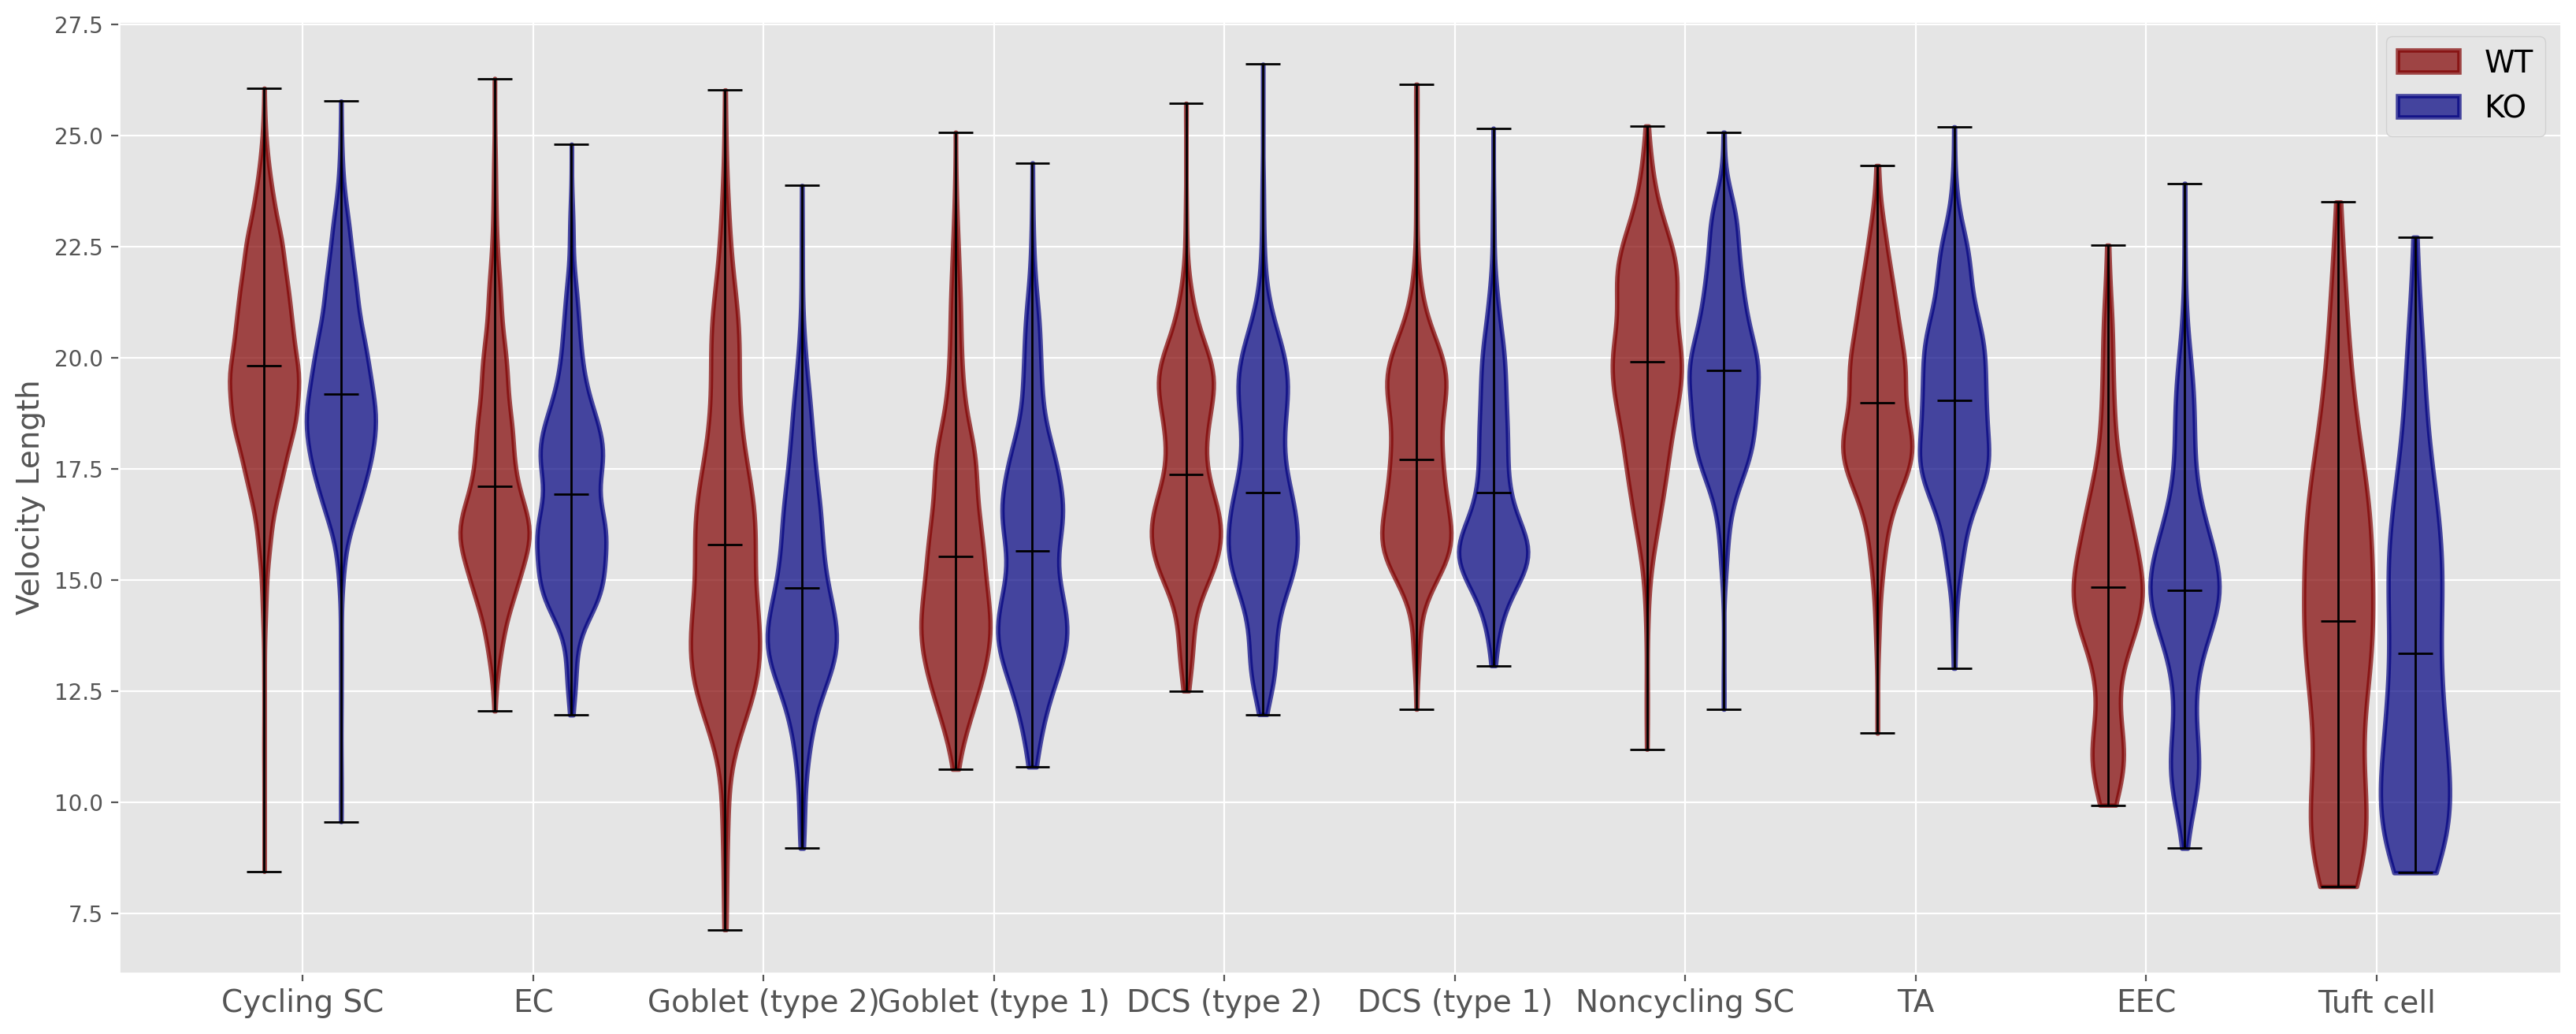

In [8]:
plt.figure(figsize=(20, 8), dpi=200)

plt.style.use('ggplot')

plt.ylabel('Velocity Length', fontsize=14)

pos = [i for i in range(3*len(celltypes)) if i%3]
violin_parts = plt.violinplot(Velocity_L, pos, points=100, widths=0.9,
                     showmeans=True, showextrema=True, showmedians=False)
label_pos = [j+0.5 for j in pos if j%2 != 0]

plt.xticks([i+0.5 for i in pos if i%3 == 1], labels = celltypes, fontsize=14)

for pc in range(len(violin_parts['bodies'])):
    if pc%2 == 0:
        violin_parts['bodies'][pc].set_color('maroon')
    else:
        violin_parts['bodies'][pc].set_color('navy')
        
    violin_parts['bodies'][pc].set_linewidth(2)
    violin_parts['bodies'][pc].set_alpha(0.7)

for partname in ('cbars','cmins','cmaxes','cmeans'):
    vp = violin_parts[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(1)

plt.legend(['WT', 'KO'], loc='upper right', prop={'size': 14})
plt.savefig('violin_velocityL.png')
plt.show()

In [9]:
KS = []
for i in [i for i in range(len(Velocity_L)) if i%2 ==0]:
    #print ([i, i+1])
    KS.append (stats.ks_2samp(Velocity_L[i], Velocity_L[i+1]))
KS  

[KstestResult(statistic=0.14888470031767123, pvalue=3.3306690738754696e-15),
 KstestResult(statistic=0.04901418093317804, pvalue=0.02711288640085685),
 KstestResult(statistic=0.1530680107809164, pvalue=2.793322984029345e-08),
 KstestResult(statistic=0.07174270864162915, pvalue=0.021554521069137578),
 KstestResult(statistic=0.09978225425205456, pvalue=0.0001869326222952994),
 KstestResult(statistic=0.2113744498300741, pvalue=1.865174681370263e-13),
 KstestResult(statistic=0.09786980231765507, pvalue=0.006915756874268597),
 KstestResult(statistic=0.03681317223232676, pvalue=0.7098748747278242),
 KstestResult(statistic=0.037712780964920534, pvalue=0.9280671191842074),
 KstestResult(statistic=0.13728395061728396, pvalue=0.09414691727572089)]

In [10]:
d,p =[],[] 
for k in KS:
    d.append(k[0])
    p.append(k[1])
KS_test = pd.DataFrame(data = {'statistic': d, 'pvalue': p}, index = celltypes)
KS_test['Significant 0.05'] = KS_test['pvalue'] < 0.05
KS_test

,statistic,pvalue,Significant 0.05
Cycling SC,0.148885,3.330669e-15,True
EC,0.049014,2.711289e-02,True
Goblet (type 2),0.153068,2.793323e-08,True
Goblet (type 1),0.071743,2.155452e-02,True
DCS (type 2),0.099782,1.869326e-04,True
DCS (type 1),0.211374,1.865175e-13,True
Noncycling SC,0.097870,6.915757e-03,True
TA,0.036813,7.098749e-01,False
EEC,0.037713,9.280671e-01,False
Tuft cell,0.137284,9.414692e-02,False
